# Basic CNN for fashion_mnist (any result is ok) >80%

In [ ]:
import numpy as np

import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load data method loads the dataset into 2 tuples
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Count of the X_train and X_test
print("X train {} and Test size {}".format(X_train.shape[0], X_test.shape[0]))

X train 60000 and Test size 10000


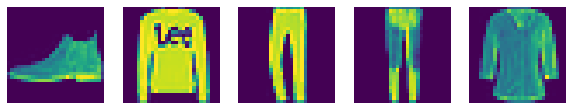

Label [9 2 1 1 6]


In [ ]:
plt.figure(figsize=(10,10))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
plt.show()

print('Label %s' % (y_test[0:5]))

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train.shape

(60000, 28, 28)

In [ ]:
# Convert to the tensor shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
print("X_Train shape {}".format(X_train.shape))
print("X_Test shape {}".format(X_test.shape))

X_Train shape (60000, 28, 28, 1)
X_Test shape (10000, 28, 28, 1)


In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
def build_init_model():
    """
        Method constructs the CNN architecture with 2D-Convolution
    """
    model = keras.models.Sequential()
    
    model.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Convolution2D(32, 3, 3))
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Convolution2D(32, 3, 3))
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Activation('softmax'))
    
    return model

In [ ]:
cnn_model = build_init_model()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 activation (Activation)     (None, 9, 9, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 activation_1 (Activation)   (None, 3, 3, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 32)          9248      
                                                                 
 activation_2 (Activation)   (None, 1, 1, 32)          0         
                                                                 
 flatten (Flatten)           (None, 32)                0

In [ ]:
history_init = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 20s 4ms/step - loss: 0.5220 - accuracy: 0.8127 - val_loss: 0.4407 - val_accuracy: 0.8399
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3596 - accuracy: 0.8676 - val_loss: 0.3780 - val_accuracy: 0.8581
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3187 - accuracy: 0.8806 - val_loss: 0.3454 - val_accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2923 - accuracy: 0.8913 - val_loss: 0.3456 - val_accuracy: 0.8701
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2740 - accuracy: 0.8975 - val_loss: 0.3268 - val_accuracy: 0.8809
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2575 - accuracy: 0.9028 - val_loss: 0.3233 - val_accuracy: 0.8858
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2473 - accuracy: 0.9074 - val_loss: 0.3043 - val_accuracy

In [ ]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32055750489234924
Test accuracy: 0.8866000175476074


# Dropout >80%

In [ ]:
def build_model():
    """
        Method constructs the CNN architecture with 2D-Convolution
    """
    model = keras.models.Sequential()
    
    model.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(0.25))
    
    model.add(keras.layers.Convolution2D(32, 3, 3))
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Convolution2D(32, 3, 3))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(0.25))
    
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Activation('softmax'))
    
    return model

In [ ]:
cnn_model = build_model()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          320       
                                                                 
 activation_5 (Activation)   (None, 9, 9, 32)          0         
                                                                 
 dropout (Dropout)           (None, 9, 9, 32)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 activation_6 (Activation)   (None, 3, 3, 32)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 32)          9248      
                                                                 
 activation_7 (Activation)   (None, 1, 1, 32)         

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6469 - accuracy: 0.7580 - val_loss: 0.4544 - val_accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4681 - accuracy: 0.8270 - val_loss: 0.3838 - val_accuracy: 0.8545
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4254 - accuracy: 0.8432 - val_loss: 0.3809 - val_accuracy: 0.8612
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4000 - accuracy: 0.8521 - val_loss: 0.3572 - val_accuracy: 0.8720
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3834 - accuracy: 0.8602 - val_loss: 0.3508 - val_accuracy: 0.8724
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3694 - accuracy: 0.8647 - val_loss: 0.3413 - val_accuracy: 0.8730
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3607 - accuracy: 0.8685 - val_loss: 0.3717 - val_accuracy:

In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.8865


[0.31863605976104736, 0.8865000009536743]

In [ ]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31863605976104736
Test accuracy: 0.8865000009536743


In [ ]:
history_dict = history.history

print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
def plot_train_instrumentation(epochs, data, train_param, val_param):
    
    plt.figure(figsize=(10,7))
    
    plt.plot(epochs, data[train_param], 'g', label=f'Training ({train_param})')
    plt.plot(epochs, data[val_param], 'red', label=f'Validation ({val_param})')
    
    plt.title("Training performance")
    plt.xlabel('Epochs')
    plt.ylabel(train_param)
    
    plt.legend()
    plt.show()

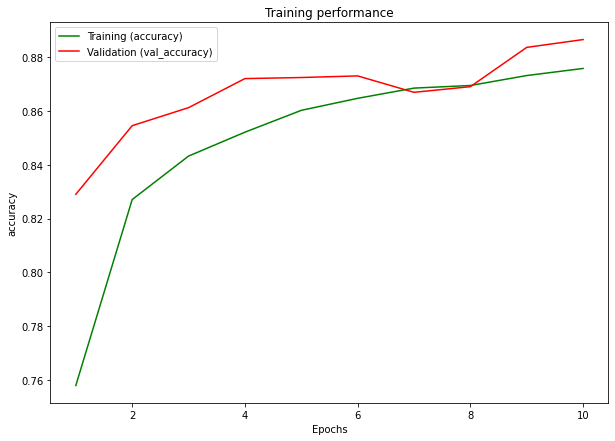

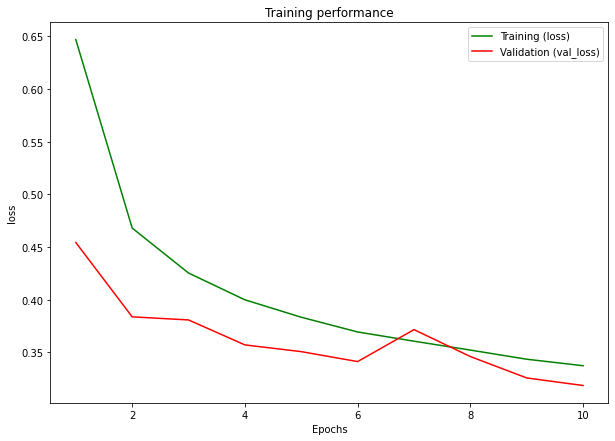

In [ ]:
epochs = range(1, len(history_dict['accuracy'])+1)

plot_train_instrumentation(epochs, history_dict, 'accuracy', 'val_accuracy')
plot_train_instrumentation(epochs, history_dict, 'loss', 'val_loss')

# L1 and L2 regularization

In [ ]:
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(200, activation='relu', kernel_regularizer=keras.regularizers.l1()),
    keras.layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(50, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 12.2656 - accuracy: 0.6329 - val_loss: 2.0696 - val_accuracy: 0.6188
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7503 - accuracy: 0.6549 - val_loss: 1.6357 - val_accuracy: 0.6666
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5125 - accuracy: 0.6909 - val_loss: 1.4050 - val_accuracy: 0.7320
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4152 - accuracy: 0.7033 - val_loss: 1.3376 - val_accuracy: 0.7392
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3605 - accuracy: 0.7105 - val_loss: 1.3066 - val_accuracy: 0.7240
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3225 - accuracy: 0.7162 - val_loss: 1.2905 - val_accuracy: 0.7380
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2914 - accuracy: 0.7200 - val_loss: 1.2584 - val_accuracy

# Data Augmentation

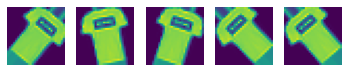

In [ ]:
# Create data augmentation object
data_augmentor = ImageDataGenerator(rotation_range=50, 
                                    width_shift_range=0.01, 
                                    height_shift_range=0.01)

# fit the training data
data_augmentor.fit(X_train)

augment = data_augmentor.flow(X_train[1:2], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()

In [ ]:
history_data_aug = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3328 - accuracy: 0.8775 - val_loss: 0.3197 - val_accuracy: 0.8865
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3256 - accuracy: 0.8804 - val_loss: 0.3281 - val_accuracy: 0.8814
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3253 - accuracy: 0.8804 - val_loss: 0.3235 - val_accuracy: 0.8833
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3166 - accuracy: 0.8857 - val_loss: 0.3390 - val_accuracy: 0.8736
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3112 - accuracy: 0.8856 - val_loss: 0.3034 - val_accuracy: 0.8886
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3103 - accuracy: 0.8867 - val_loss: 0.3189 - val_accuracy: 0.8841
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.8885 - val_loss: 0.3205 - val_accuracy:

In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2969 - accuracy: 0.8939


[0.29690414667129517, 0.8938999772071838]

In [ ]:
history_dict = history_data_aug.history

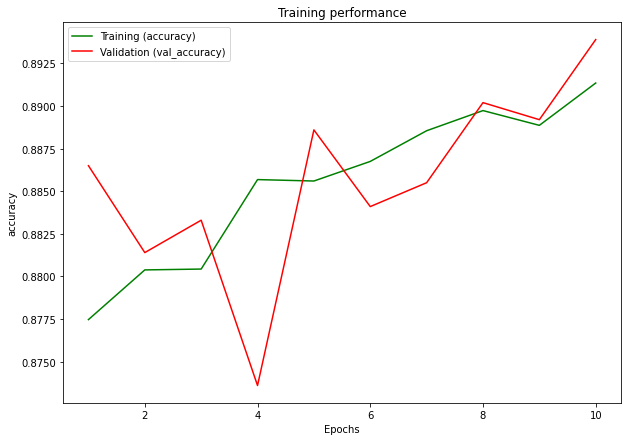

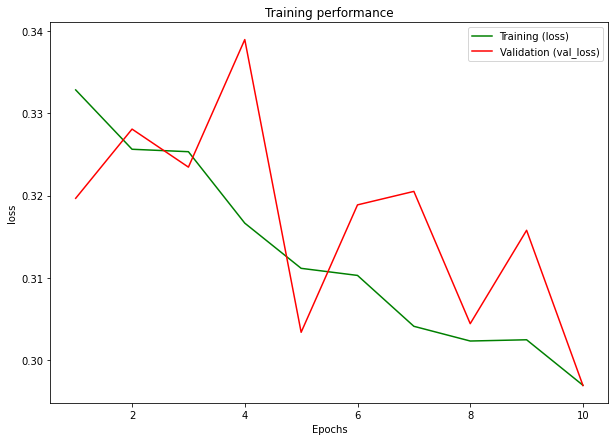

In [ ]:
plot_train_instrumentation(epochs, history_dict, 'accuracy', 'val_accuracy')
plot_train_instrumentation(epochs, history_dict, 'loss', 'val_loss')

# Callback Early stopping to avoid overfitting

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    # tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history_early_stop = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=my_callbacks)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2952 - accuracy: 0.8910 - val_loss: 0.3192 - val_accuracy: 0.8834
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2956 - accuracy: 0.8913 - val_loss: 0.3176 - val_accuracy: 0.8825
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2918 - accuracy: 0.8923 - val_loss: 0.3076 - val_accuracy: 0.8897
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2913 - accuracy: 0.8932 - val_loss: 0.3140 - val_accuracy: 0.8876
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2883 - accuracy: 0.8930 - val_loss: 0.3052 - val_accuracy: 0.8889
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2874 - accuracy: 0.8960 - val_loss: 0.2916 - val_accuracy: 0.8980
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2840 - accuracy: 0.8962 - val_loss: 0.3124 - val_accuracy:

# BatchNormalization

In [ ]:
def construct_model(input_shape=(28,28,1)):
    
    model = keras.models.Sequential()
    
    model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape= input_shape))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(32, kernel_size=5, strides=2, padding='same',  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    ## Dropout Regularization of 0.4 in order to avoid overfitting
    model.add(keras.layers.Conv2D(64, kernel_size=3,  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(64, kernel_size=3,  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(64, kernel_size=5, strides=2, padding='same',  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    
    model.add(keras.layers.Conv2D(64, kernel_size=4,  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [ ]:
conv_model = construct_model((28,28,1))

conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)      

In [ ]:
# Compile the model
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model with training set
history = conv_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.6273 - accuracy: 0.7777 - val_loss: 0.3713 - val_accuracy: 0.8645
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3981 - accuracy: 0.8600 - val_loss: 0.2976 - val_accuracy: 0.8867
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3400 - accuracy: 0.8796 - val_loss: 0.2912 - val_accuracy: 0.8902
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3108 - accuracy: 0.8905 - val_loss: 0.2579 - val_accuracy: 0.9055
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2891 - accuracy: 0.8996 - val_loss: 0.2544 - val_accuracy: 0.9072
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2686 - accuracy: 0.9052 - val_loss: 0.2323 - val_accuracy: 0.9148
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2571 - accuracy: 0.9103 - val_loss: 0.2219 - val_accur

In [ ]:
def plot_model_performance(model_history, metric, val_metric):
    plt.figure(figsize=(10,8))
    plt.plot(model_history.history[metric], label=str('Training '+ metric))
    plt.plot(model_history.history[val_metric], label=str('Validation '+ val_metric))
    plt.title(metric+" vs "+val_metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()
    plt.show()

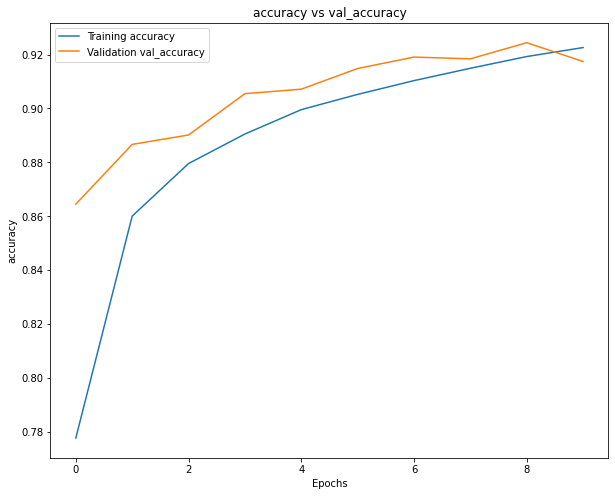

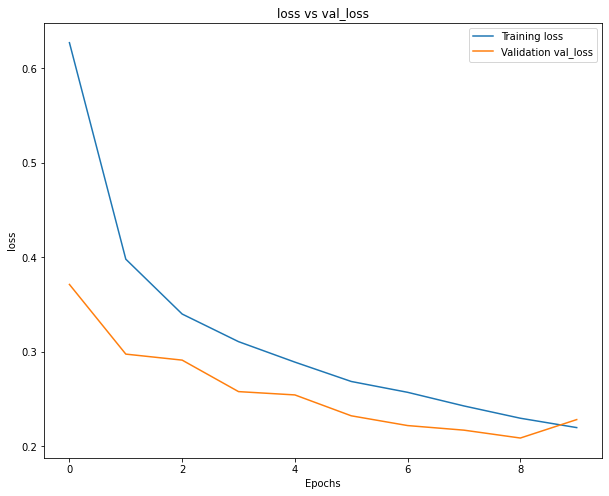

In [ ]:
plot_model_performance(history, 'accuracy', 'val_accuracy')
plot_model_performance(history, 'loss', 'val_loss')

# Grad-CAM show

In [ ]:
from keras.layers import Input, Dense, Conv1D, Conv2D, MaxPooling1D,\
    MaxPooling2D, UpSampling1D, UpSampling2D, Dropout, Lambda, Convolution2D,\
    Reshape, Activation, Flatten, add, concatenate, Subtract, BatchNormalization
from keras.models import Model, Sequential
from keras.datasets import fashion_mnist
import numpy as np
import keras
import tensorflow as tf

nb_classes=10
nb_epoch=25
batch_size=150

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [ ]:
input_shape=(28,28,1)

input = Input(input_shape, name='input')

layer=Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same')(input)
layer=BatchNormalization()(layer)
layer=Conv2D(32, kernel_size=(2, 2), activation='relu',padding='same')(layer)
layer=BatchNormalization()(layer)

layer=Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same')(layer)
layer=BatchNormalization()(layer)
layer=Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same')(layer)
layer=BatchNormalization()(layer)
layer=MaxPooling2D(pool_size=(2, 2))(layer)

layer=Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same')(layer)
layer=BatchNormalization()(layer)
layer=Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same')(layer)
layer=BatchNormalization()(layer)
layer=MaxPooling2D(pool_size=(2, 2))(layer)

layer=Conv2D(256, kernel_size=(2, 2), activation='relu', padding='same')(layer)
layer=BatchNormalization()(layer)
layer=Conv2D(256, kernel_size=(2, 2), activation='relu', padding='same',name='final')(layer)
layer=BatchNormalization()(layer)
layer=MaxPooling2D(pool_size=(2, 2))(layer)


layer = Dropout(0.5)(layer)
layer = Flatten(name='flatten')(layer)
output = Dense(nb_classes, name="Dense_10nb", activation='softmax')(layer)

model = Model(inputs=[input], outputs=[output])

model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.0001,decay=1e-6),metrics = ['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        4128      
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        8256

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
%%time
from matplotlib import cm
import matplotlib.pyplot as plt
from tf_keras_vis.gradcam import Gradcam,GradcamPlusPlus
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
def Grad_CAM_savepictures(file_index,model):
  def loss(output):
    return (output[0][y_test[file_index]])
  def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m
  # Create Gradcam object
  gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)
  originalimage=X_test[file_index]
  originalimage=originalimage.reshape((1,originalimage.shape[0],originalimage.shape[1],1))

  # Generate heatmap with GradCAM
  cam = gradcam(loss,originalimage,penultimate_layer=-1)
  cam = normalize(cam)

  #overlap image
  ax1=plt.subplot(1, 3, 1)
  heatmap = np.uint8(cm.jet(cam)[..., :3] * 255)
  ax1.imshow(X_test[file_index].reshape((X_test.shape[1],X_test.shape[2])),cmap="gray")
  ax1.imshow(heatmap.reshape((X_test.shape[1],X_test.shape[2],3)), cmap='jet', alpha=0.4) # overlay
  ax1.set_title("Grad-CAM")

  gradcam = GradcamPlusPlus(model,model_modifier=model_modifier,clone=False)
  cam = gradcam(loss,originalimage,penultimate_layer=-1)
  cam = normalize(cam)

  ax1=plt.subplot(1, 3, 2)
  heatmap = np.uint8(cm.jet(cam)[..., :3] * 255)
  ax1.imshow(X_test[file_index].reshape((X_test.shape[1],X_test.shape[2])),cmap="gray")
  ax1.imshow(heatmap.reshape((X_test.shape[1],X_test.shape[2],3)), cmap='jet', alpha=0.4) # overlay
  ax1.set_title("Grad-CAMPlusPlus")

  # plt.savefig(save_name)
  plt.show()

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 34.3 µs


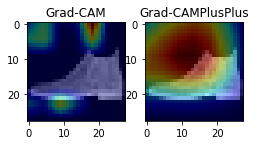

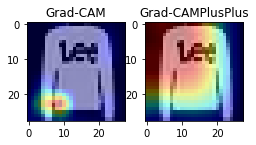

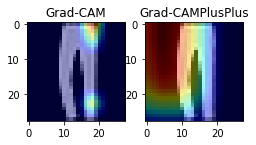

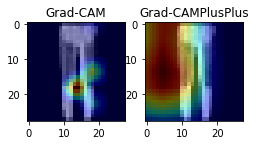

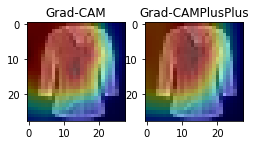

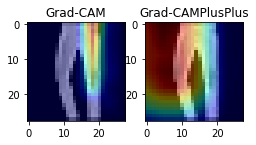

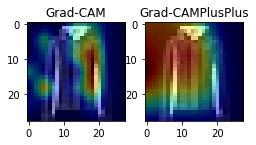

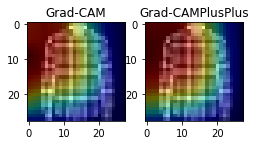

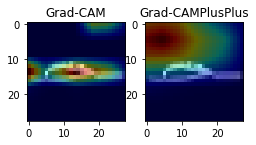

In [ ]:
for i in range(9):
  Grad_CAM_savepictures(i,model)